In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import transform

In [2]:
from keras.datasets import boston_housing

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

Using TensorFlow backend.


### Данные:
Будем работать с датасетом [Boston Housing Prices](https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef).

Text(0.5,0,'Price')

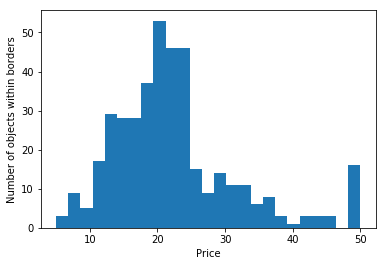

In [3]:
plt.hist(y_train, bins=25)
plt.ylabel('Number of objects within borders')
plt.xlabel('Price')

### Задание.
Будем решать задачу регрессии. Целевая переменная -- цена дома, признаки - различная информация о домохозяйстве. Для решения будем использовать линейную регрессию. Ваша задача - оценить качество решения в зависимости от количества объектов в обучающей выборке. Качество решения будем оценивать с помощью среднеквадратичной и среднеабсолютной ошибки, а так же [коэффициента детерминации $r^2$](http://scikit-learn.org/stable/modules/model_evaluation.html#r2-score-the-coefficient-of-determination). Также требуется оценить дисперсию данных функционалов в зависимости от числа объектов в обучающей выборке. 

*Обращаем ваше внимание, что для качественной оценки данных зависимостей эксперименты для каждого размера выборки стоит повторять многократно на различных случайных подвыборках.*

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Text(0.5,1,'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

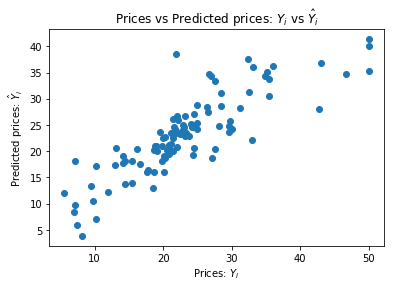

In [5]:
lm = LinearRegression()
lm.fit(X_train, y_train)

y_pred = lm.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

In [6]:
print('mae = {}'.format(mean_absolute_error(y_test, y_pred)))
print('mse = {}'.format(mean_squared_error(y_test, y_pred)))
print('prediction variance = {}'.format(np.std((y_test - y_pred)**2)))

mae = 3.464185812406934
mse = 23.195599256426295
prediction variance = 45.780486850345746


In [8]:
runs = 1000
mae = np.zeros((len(X_train), runs))
mse = np.zeros((len(X_train), runs))
r2 = np.zeros((len(X_train), runs))
for i in range(len(X_train)):
    for j in range(runs):
        ind = np.random.choice(np.arange(len(X_train)), i + 1, replace=False)
        n_x, n_y = X_train[ind], y_train[ind]
        lm.fit(n_x, n_y)
        y_pred = lm.predict(X_test)
        mae[i][j] = mean_absolute_error(y_test, y_pred)
        mse[i][j] = mean_squared_error(y_test, y_pred)
        r2[i][j] = r2_score(y_test, y_pred)

In [14]:
mae_m = np.mean(mae, axis=1)
mae_d = np.var(mae, axis=1)
mse_m = np.mean(mse, axis=1)
mse_d = np.var(mse, axis=1)
r2_m = np.mean(r2, axis=1)
r2_d = np.var(r2, axis=1)

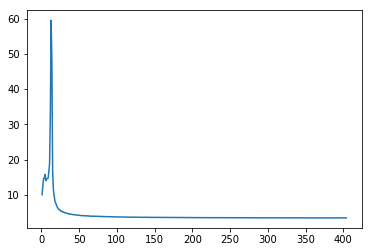

In [13]:
x = np.arange(1, len(X_train) + 1)
plt.plot(x, mae_m)

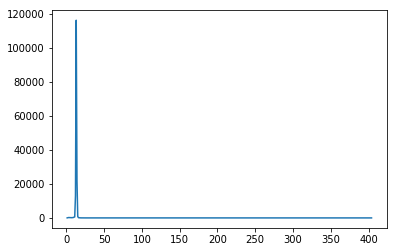

In [17]:
plt.plot(x, mae_d)

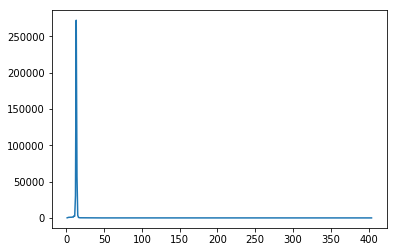

In [15]:
plt.plot(x, mse_m)

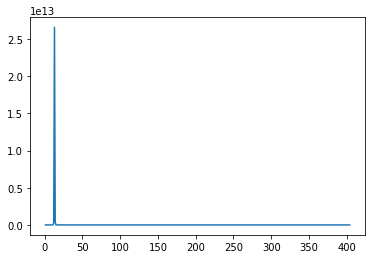

In [18]:
plt.plot(x, mse_d)

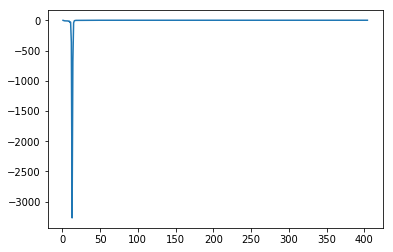

In [16]:
plt.plot(x, r2_m)

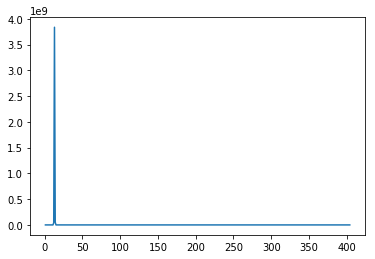

In [19]:
plt.plot(x, r2_d)

In [8]:
len(X_train)

404

In [11]:
runs = 10
mse = np.zeros((len(X_train) - 100, len(X_test)))
for i in range(100, len(X_train)):
    for k in range(len(X_test)):
        for j in range(runs):
            ind = np.random.choice(np.arange(len(X_train)), i + 1, replace=False)
            ind1 = np.random.choice(np.arange(len(X_test)), k + 1, replace=False)
            n_x, n_y = X_train[ind], y_train[ind]
            x_n, y_n = X_test[ind1], y_test[ind1]
            lm.fit(n_x, n_y)
            y_pred = lm.predict(x_n)
            mse[i - 100][k] = mean_squared_error(y_n, y_pred)
        mse[i - 100][k] /= runs

In [12]:
from mpl_toolkits.mplot3d import Axes3D

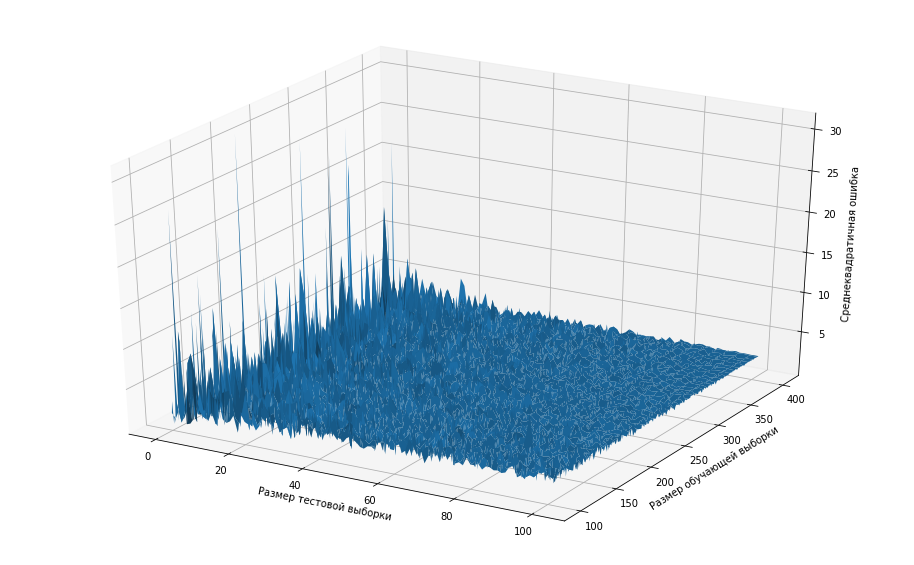

In [23]:
fig = plt.figure(figsize=(16, 10))
ax = fig.gca(projection='3d') # get current axis 

# Создаем массивы NumPy с координатами точек по осям X и У. 
# Используем метод meshgrid, при котором по векторам координат 
# создается матрица координат. Задаем нужную функцию Z(x, y). 
Y = np.arange(100, len(X_train), 1) 
X = np.arange(0, len(X_test), 1) 
X, Y = np.meshgrid(X, Y) 

# Наконец, используем метод *plot_surface* объекта 
# типа Axes3DSubplot. Также подписываем оси. 
surf = ax.plot_surface(X, Y, mse) 
ax.set_xlabel('Размер тестовой выборки') 
ax.set_ylabel('Размер обучающей выборки') 
ax.set_zlabel('Среднеквадратичная ошибка') 
plt.show()
plt.savefig('HousingPrices.png')